<div >
    <h1>Introduction 🧐</h1>
</div>


*Author: Samanyu*<br>
*Accelerator: GPU P1000*<br>
*Language: Pyton*

<div>
    <h1>Dataset Description and Goal 🪄</h1>
</div>


**Dataset Description:** <br>
Data is divided into 2 folders, fire_images folder contains 755 outdoor-fire images some of them contains heavy smoke, the other one is non-fire_images which contain 244 nature images (eg: forest, tree, grass, river, people, foggy forest, lake, animal, road, and waterfall).<br><br>
**Goal:** <br>
Distinguishing images that contain fire and regular images :)

<div>
    <h1>Loading the Directories 🔃</h1>
</div>

In [1]:
# importing

import os
import shutil
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [2]:
# Loading the directories

fire=r'/kaggle/input/fire-dataset/fire_dataset/fire_images'
nonfire=r'/kaggle/input/fire-dataset/fire_dataset/non_fire_images'

<div >
    <h1>Splitting the Dataset 🪓</h1>
</div>

In [3]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

fire_dir = r'/kaggle/input/fire-dataset/fire_dataset/fire_images'
nonfire_dir = r'/kaggle/input/fire-dataset/fire_dataset/non_fire_images'
fire_images = [os.path.join(fire_dir, img) for img in os.listdir(fire_dir)]
nonfire_images = [os.path.join(nonfire_dir, img) for img in os.listdir(nonfire_dir)]

fire_labels = [1] * len(fire_images)
nonfire_labels = [0] * len(nonfire_images)

all_images = fire_images + nonfire_images
all_labels = fire_labels + nonfire_labels
X_train, X_temp, y_train, y_temp = train_test_split(all_images, all_labels, test_size=0.3, stratify=all_labels, random_state=20)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=20)

output_dirs = {
    "train": "/kaggle/working/fire_dataset/train",
    "val": "/kaggle/working/fire_dataset/val",
    "test": "/kaggle/working/fire_dataset/test"
}

for split in output_dirs:
    os.makedirs(os.path.join(output_dirs[split], "fire"), exist_ok=True)
    os.makedirs(os.path.join(output_dirs[split], "nonfire"), exist_ok=True)
def copy_images(image_paths, labels, split):
    for img_path, label in zip(image_paths, labels):
        category = "fire" if label == 1 else "nonfire"
        dest_path = os.path.join(output_dirs[split], category, os.path.basename(img_path))
        shutil.copy(img_path, dest_path)
        
copy_images(X_train, y_train, "train")
copy_images(X_val, y_val, "val")
copy_images(X_test, y_test, "test")

print("Dataset successfully split and saved.")

Dataset successfully split and saved.



<div>
    <h1>Reading and Preprocessing Data from Directories 👓👓</h1>
</div>

In [4]:
img_size=(320,320)
bth_size=32

# Augmenting Images for training set

trdatagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    validation_split=0.1
)

# Only Rescaling or Normalizing the pixel values for testing Set
tedatagen = ImageDataGenerator(rescale=1.0/255)

In [5]:
# Reading the training data from directory

traingen= trdatagen.flow_from_directory(
    r'/kaggle/working/fire_dataset/train',
    target_size=img_size,
    batch_size=bth_size,
    color_mode='rgb',  
    class_mode='categorical',
    shuffle=True)

# Reading the testing data from Directory

testgen = tedatagen.flow_from_directory(
    r'/kaggle/working/fire_dataset/test',
    target_size=img_size,
    batch_size=bth_size,
    color_mode='rgb', 
    class_mode='categorical',
    shuffle=False
)

# Validation data 
valgen = trdatagen.flow_from_directory(
    r'/kaggle/working/fire_dataset/val',
    target_size=img_size,
    batch_size=bth_size,
    color_mode='rgb',  
    class_mode='categorical',
    shuffle=True,
      
)

Found 699 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
Found 150 images belonging to 2 classes.



<div>
    <h1>Displaying the Images 🔥🔥</h1>
</div>


In [6]:
# importing
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

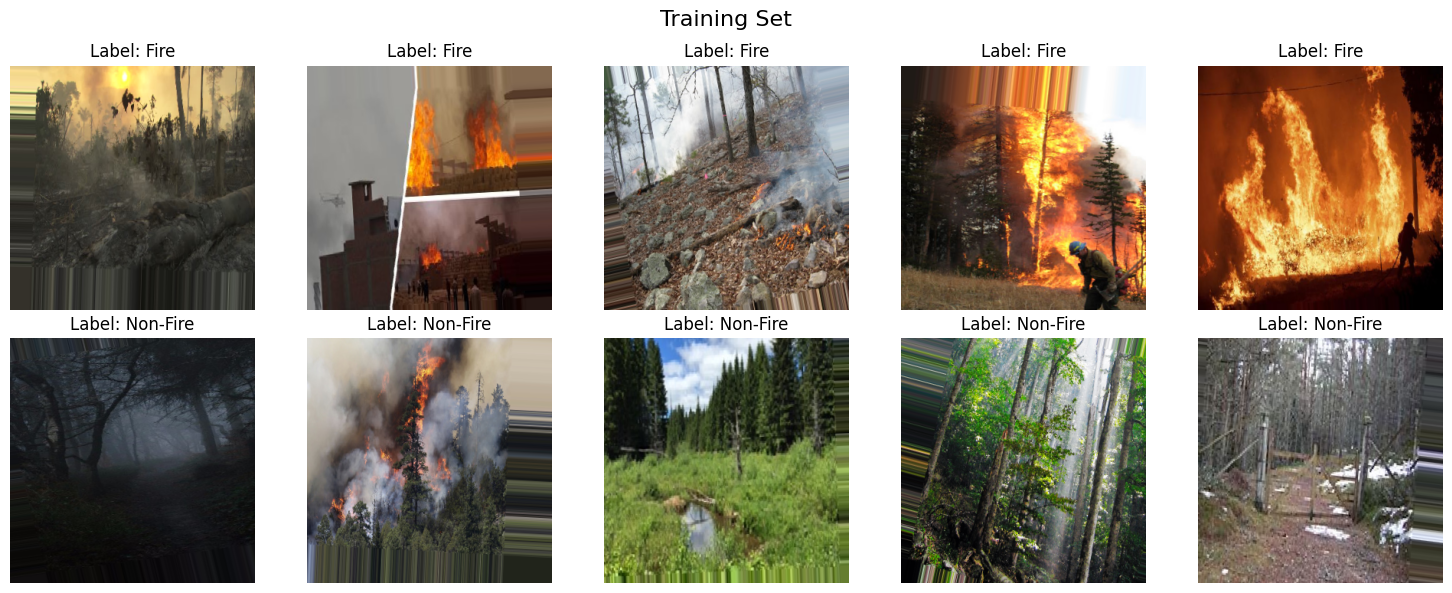

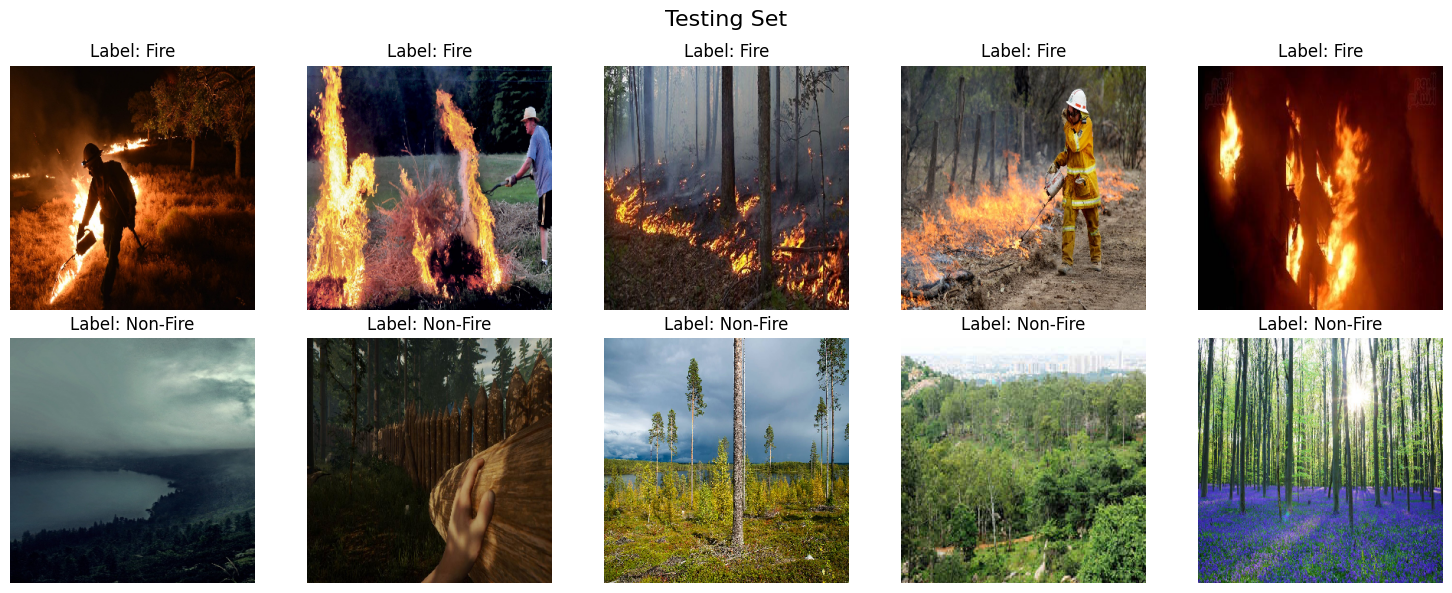

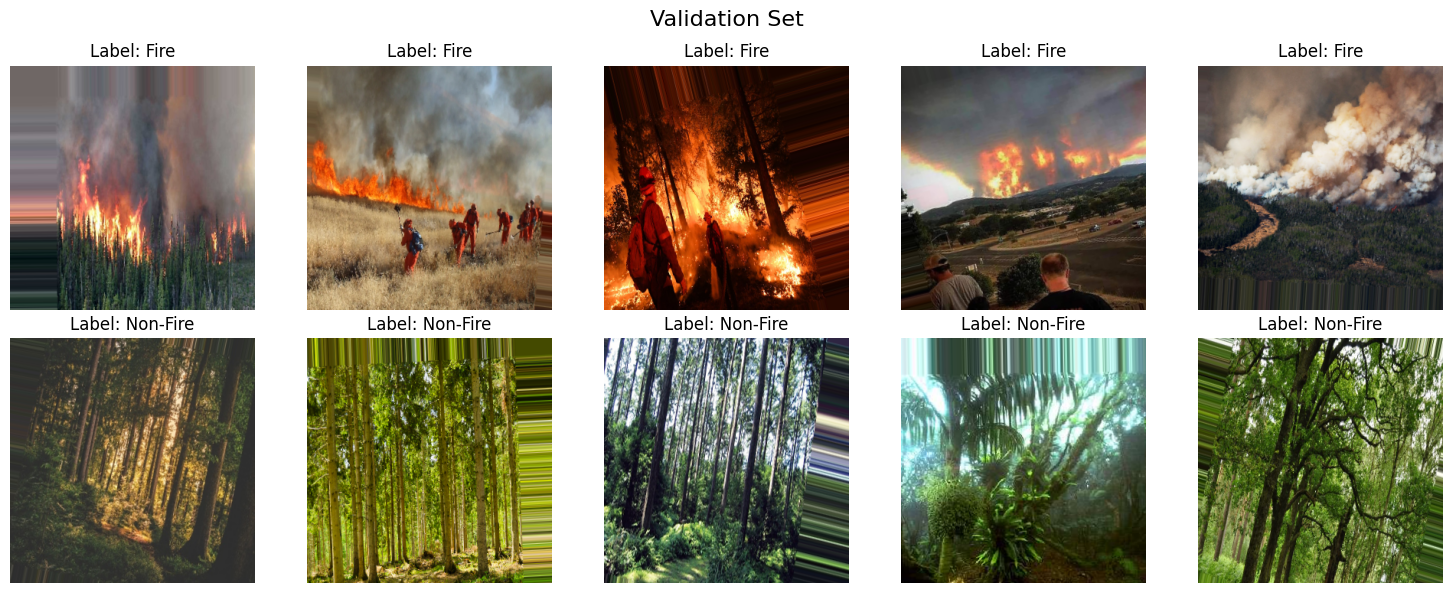

In [7]:
def plot_balanced_images(generator, title, num_per_class=5):
    images_collected = {"fire": [], "nonfire": []}  
    
    while len(images_collected["fire"]) < num_per_class or len(images_collected["nonfire"]) < num_per_class:
        images, labels = next(generator)  
        class_indices = generator.class_indices  
        inv_class_indices = {v: k for k, v in class_indices.items()} 
        class_labels = np.argmax(labels, axis=1)  
        for img, label_idx in zip(images, class_labels):
            class_name = inv_class_indices[label_idx]  
            if class_name in images_collected and len(images_collected[class_name]) < num_per_class:
                images_collected[class_name].append(img)
        if generator.batch_index == 0:
            break  


    selected_images = images_collected["fire"][:num_per_class] + images_collected["nonfire"][:num_per_class]
    labels = ["Fire"] * num_per_class + ["Non-Fire"] * num_per_class
    num_rows = 2 if num_per_class > 1 else 1
    fig, axes = plt.subplots(num_rows, num_per_class, figsize=(15, 6))
    fig.suptitle(title, fontsize=16)
    if num_rows == 1:  
        axes = np.expand_dims(axes, axis=0)

    for i, (img, label) in enumerate(zip(selected_images, labels)):
        ax = axes[i // num_per_class, i % num_per_class]
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Label: {label}")

    plt.tight_layout()
    plt.show()

plot_balanced_images(traingen, "Training Set")
plot_balanced_images(testgen, "Testing Set")
plot_balanced_images(valgen, "Validation Set")


<div>
    <h1>Visualizing the Distribution 🤯 </h1>
</div>


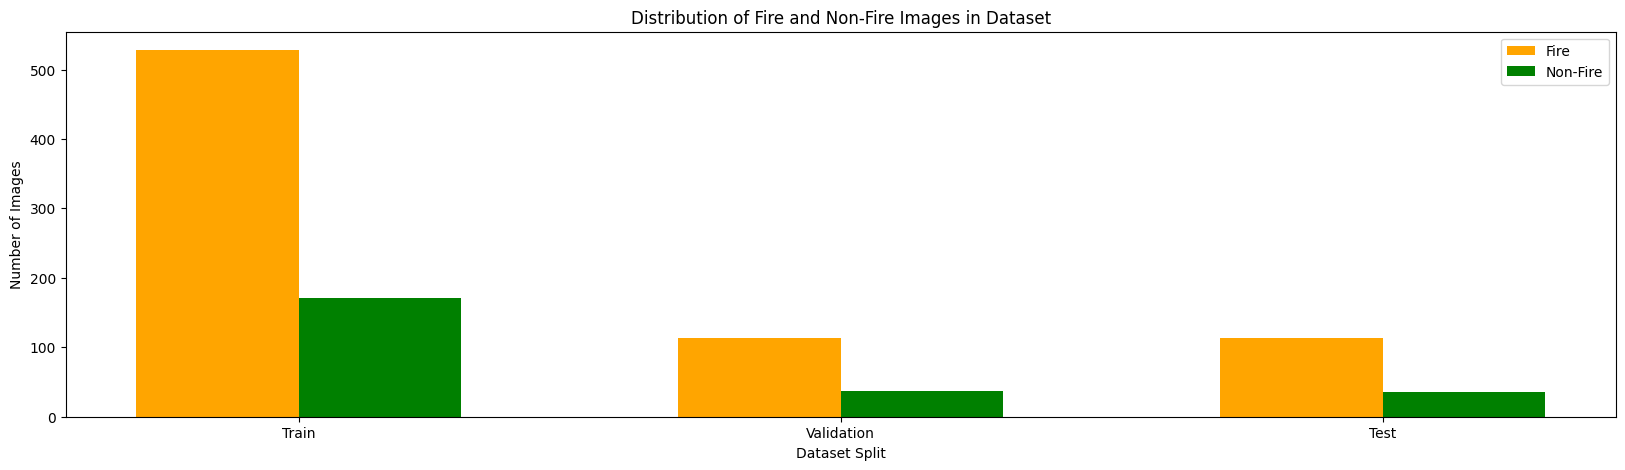

In [8]:
train_fire_dir = '/kaggle/working/fire_dataset/train/fire'
val_fire_dir = '/kaggle/working/fire_dataset/val/fire'
test_fire_dir = '/kaggle/working/fire_dataset/test/fire'

train_nonfire_dir = '/kaggle/working/fire_dataset/train/nonfire'
val_nonfire_dir = '/kaggle/working/fire_dataset/val/nonfire'
test_nonfire_dir = '/kaggle/working/fire_dataset/test/nonfire'

train_fire = len(os.listdir(train_fire_dir))
val_fire = len(os.listdir(val_fire_dir))
test_fire = len(os.listdir(test_fire_dir))
train_nonfire = len(os.listdir(train_nonfire_dir))
val_nonfire = len(os.listdir(val_nonfire_dir))
test_nonfire = len(os.listdir(test_nonfire_dir))

categories = ["Train", "Validation", "Test"]
fire_counts = [train_fire, val_fire, test_fire]
nonfire_counts = [train_nonfire, val_nonfire, test_nonfire]


x = np.arange(len(categories))  
width = 0.3 

fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(x - width/2, fire_counts, width, label="Fire", color="orange")  # Fire images
ax.bar(x + width/2, nonfire_counts, width, label="Non-Fire", color="green")  # Non-fire images

ax.set_xlabel("Dataset Split")
ax.set_ylabel("Number of Images")
ax.set_title("Distribution of Fire and Non-Fire Images in Dataset")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.show()

<div >
    <h1>Training the Model 🥷 </h1>
</div>

In [9]:
# importing

import keras as k
from keras.models import Sequential
from keras.layers import Conv2D,BatchNormalization,Activation,GlobalAveragePooling2D,Dropout,Dense,MaxPooling2D
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

# Define model
model = Sequential()

# CNN Layer 1
model.add(Conv2D(32, (3,3), padding='same', input_shape=(320, 320, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# CNN Layer 2
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# CNN Layer 3
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Global Average Pooling instead of Flatten
model.add(GlobalAveragePooling2D())

# Dense Layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(2, activation='sigmoid'))

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 320, 320, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 320, 320, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 160, 160, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 160, 160, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 160, 160, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 160, 160, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 80, 80, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 80, 80, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 80, 80, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 80, 80, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 40, 40, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 40, 40, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,706 (502.76 KB)

 Trainable params: 127,746 (499.01 KB)

 Non-trainable params: 960 (3.75 KB)

In [11]:
#Implementing Early Stopping and Learning Rate Reduction
es=EarlyStopping(monitor='val_loss', patience=25, verbose=1, restore_best_weights=True)
lr=ReduceLROnPlateau(monitor='val_loss', factor=0.001, patience=10, verbose=1, min_delta=0.0001)

callbacks_list=[es,lr]

In [12]:
history = model.fit(
    traingen,
    epochs=70,
    validation_data=valgen,
    callbacks=callbacks_list
)

Epoch 1/70


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.7588 - loss: 0.5745 - val_accuracy: 0.7533 - val_loss: 0.6025 - learning_rate: 0.0010
Epoch 2/70
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 948ms/step - accuracy: 0.8896 - loss: 0.3287 - val_accuracy: 0.7533 - val_loss: 0.5467 - learning_rate: 0.0010
Epoch 3/70
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 989ms/step - accuracy: 0.9074 - loss: 0.2529 - val_accuracy: 0.7533 - val_loss: 0.5752 - learning_rate: 0.0010
Epoch 4/70
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9124 - loss: 0.2245 - val_accuracy: 0.7533 - val_loss: 0.6060 - learning_rate: 0.0010
Epoch 5/70
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9323 - loss: 0.2147 - val_accuracy: 0.7533 - val_loss: 0.6294 - learning_rate: 0.0010
Epoch 6/70
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9315 - loss: 0.2464 - val_accuracy: 0.7533 - val_loss: 0.6989 - learning_rate: 0.0010
Epoch 7/70
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9274 - loss: 0.2069 - val_accuracy: 0.753

<div style="background-color: black; color: orange; padding: 20px; text-align: center; border-radius: 10px;">
    <h1>Prediction 🔮 </h1>
</div>

In [13]:
test_loss, test_accuracy = model.evaluate(testgen)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 520ms/step - accuracy: 0.9418 - loss: 0.1524


<div |>
    <h1>Evaluation Metrics 📙 </h1>
</div>

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.utils import to_categorical

Test Accuracy: 0.94
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 560ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       114
           1       0.83      0.94      0.88        36

    accuracy                           0.94       150
   macro avg       0.91      0.94      0.92       150
weighted avg       0.95      0.94      0.94       150

Confusion Matrix:
[[107   7]
 [  2  34]] 




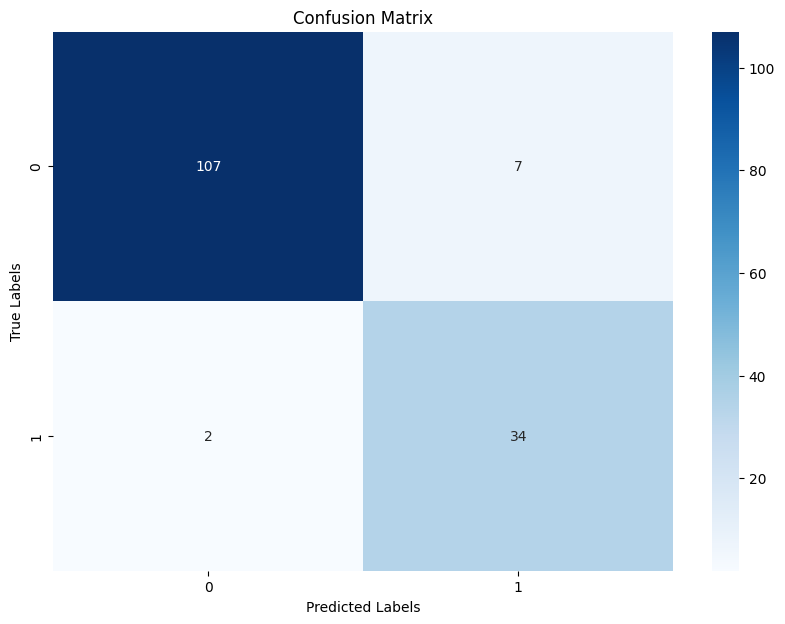

Training class indices: {'fire': 0, 'nonfire': 1}
Test class indices: {'fire': 0, 'nonfire': 1}


In [15]:
print(f"Test Accuracy: {test_accuracy:.2f}")
y_pred = np.argmax(model.predict(testgen), axis=1)
y_true = testgen.classes
print("Classification Report:")
print(classification_report(y_true, y_pred))
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix,'\n\n')
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', )
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print("Training class indices:", traingen.class_indices)
print("Test class indices:", testgen.class_indices)

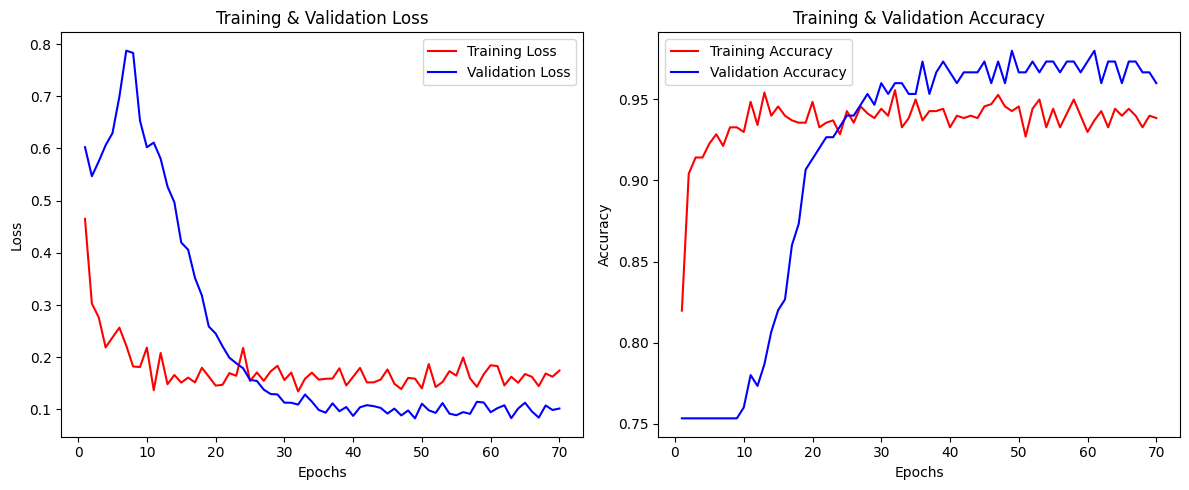

In [18]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

<div >
    <h1>Feedback and Suggeestions 😃 </h1>
</div>

**If you liked this notebook or if you found it helpful kindly upvote :)** <br>
**Kindly provide feedback and suggestions to improve this notebook**